In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/Tumor_data/Training"
test_dir = "/content/drive/MyDrive/Tumor_data/Testing"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

print("Data Loaded Successfully!")


Found 2892 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Data Loaded Successfully!


In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


In [6]:
def load_image(image_path):
    img = cv2.imread(image_path)  # Load Image
    img = cv2.resize(img, (224, 224))  # Resize to match CNN input
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    return img


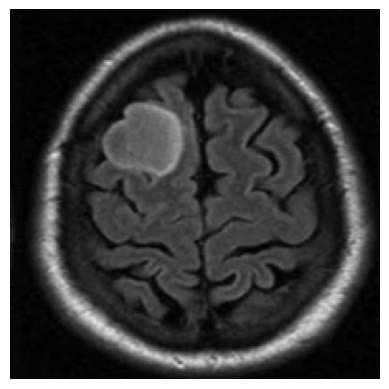

In [7]:
image_path = "/content/drive/MyDrive/Tumor_data/Testing/glioma_tumor/image(100).jpg"
img = load_image(image_path)
plt.imshow(img)
plt.axis("off")
plt.show()


## Data Augmentation using OpenCV

In [8]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, matrix, (w, h))
    return rotated


In [9]:
def flip_image(image):
    return cv2.flip(image, 1)  # Flip horizontally


In [10]:
def adjust_brightness(image, value=30):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] + value, 0, 255)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


In [11]:
def add_noise(image):
    noise = np.random.randint(0, 50, image.shape, dtype='uint8')
    noisy = cv2.add(image, noise)
    return noisy


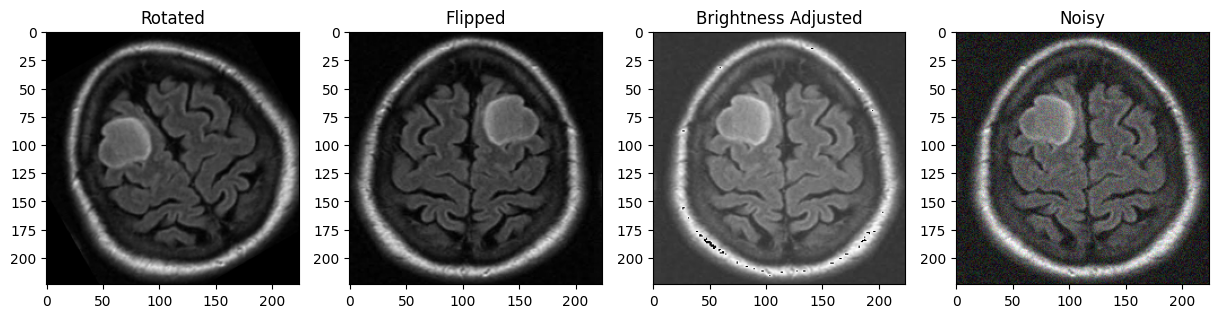

In [12]:
img_rotated = rotate_image(img, 30)
img_flipped = flip_image(img)
img_bright = adjust_brightness(img, 50)
img_noisy = add_noise(img)

# Plot the Augmented Images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img_rotated)
axes[0].set_title("Rotated")
axes[1].imshow(img_flipped)
axes[1].set_title("Flipped")
axes[2].imshow(img_bright)
axes[2].set_title("Brightness Adjusted")
axes[3].imshow(img_noisy)
axes[3].set_title("Noisy")
plt.show()


## Feature Extraction using OpenCV

# Edge Detection (Canny)

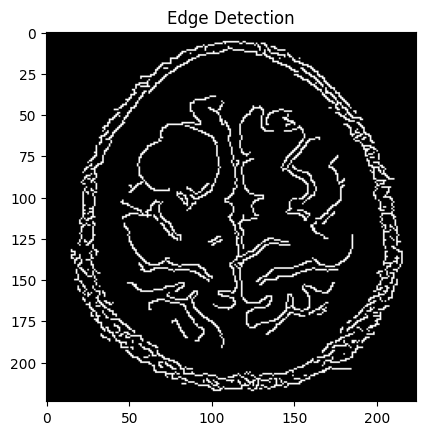

In [13]:
def edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

edges = edge_detection(img)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.show()


# Histogram of Oriented Gradients (HOG)

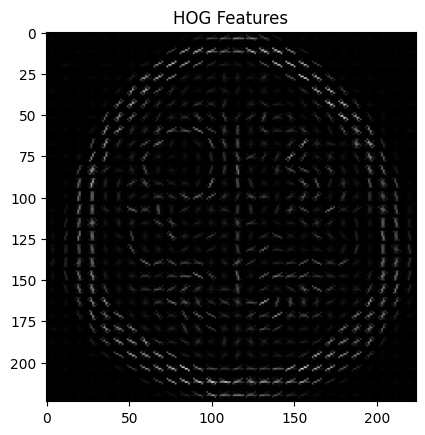

In [14]:
from skimage.feature import hog

def extract_hog_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    features, hog_image = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                              visualize=True, block_norm="L2-Hys")
    return features, hog_image

hog_features, hog_image = extract_hog_features(img)
plt.imshow(hog_image, cmap="gray")
plt.title("HOG Features")
plt.show()


# GLCM Texture Features

In [15]:
from skimage.feature import graycomatrix, graycoprops

def extract_glcm_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    return {"Contrast": contrast, "Energy": energy, "Homogeneity": homogeneity}

glcm_features = extract_glcm_features(img)
print("GLCM Features:", glcm_features)


GLCM Features: {'Contrast': 79.05182975656632, 'Energy': 0.05343916538821457, 'Homogeneity': 0.2844662346765221}
